In [1]:
import sys
sys.path.append('../')
import lusee
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obs = lusee.LObservation(deltaT_sec=60)
S  = lusee.LSatellite()

In [3]:
posxyz=S.predict_position_mcmf(obs.times)

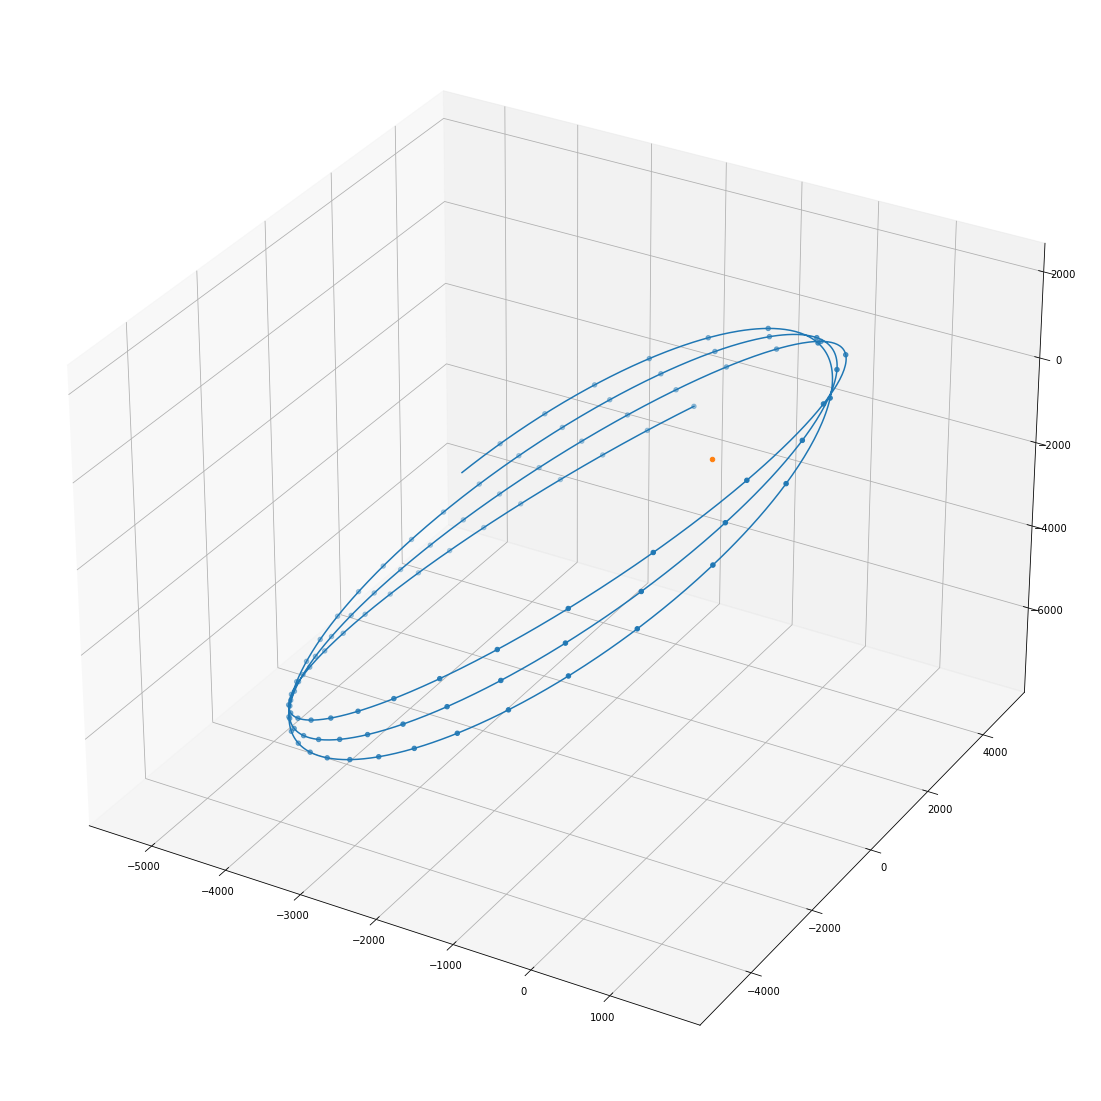

In [4]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.plot3D(posxyz[:2000,0],posxyz[:2000,1],posxyz[:2000,2])
ax.scatter3D(posxyz[:2000:20,0],posxyz[:2000:20,1],posxyz[:2000:20,2])
ax.scatter3D(0,0,0)

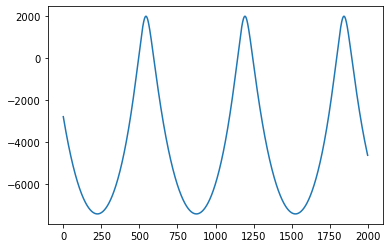

In [5]:
plt.plot(posxyz[:2000,2])

In [6]:
Lat = -10./180*np.pi
Long = 180./180*np.pi
RMoon = 1737.4
nvec = RMoon*np.array([np.cos(Lat)*np.cos(Long),np.cos(Lat)*np.sin(Long), np.sin(Lat)])
vec_NS = np.array([-np.sin(Lat)*np.cos(Long),-np.sin(Lat)*np.sin(Long), np.cos(Lat)])
vec_EW = np.array([-np.sin(Long),np.cos(Long),0])
assert (np.dot(nvec,vec_NS)<1e-13)
assert (np.dot(nvec,vec_EW)<1e-13)
assert (np.dot(vec_NS,vec_EW)<1e-16)
assert (np.dot(vec_NS,vec_NS)-1<1e-16)
assert (np.dot(vec_EW,vec_EW)-1<1e-16)


In [7]:
posrel = posxyz - nvec[None,:] #this is vector from lander to satellite
visible=np.sum(posrel*nvec[None,:],axis=1)>0
Rsat = np.sqrt(np.sum(posrel**2,axis=1))
X = np.sum(posrel*vec_EW[None,:],axis=1)/Rsat
Y = np.sum(posrel*vec_NS[None,:],axis=1)/Rsat

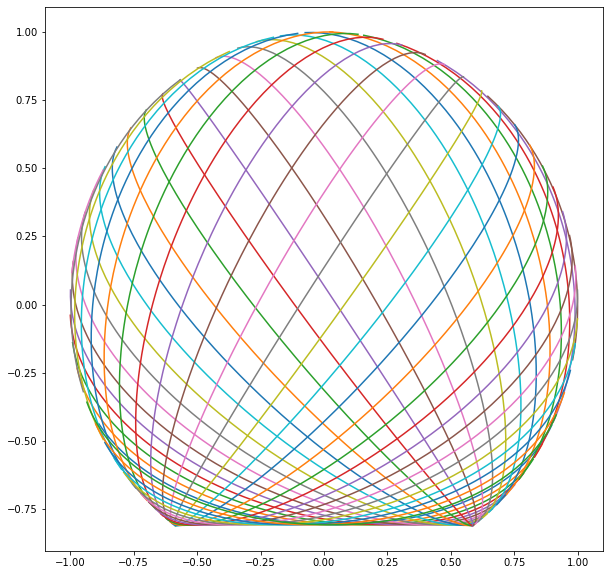

In [8]:
plt.figure(figsize=(10,10))
## Find each passage separately:
if visible[0]:
    si=0
    tostate=False
else:
    tostate = True
    
for i,v in enumerate(visible):
    if v==tostate:
        if not tostate: 
            plt.plot(X[si:i], Y[si:i])
        else:
            si=i
        tostate = not tostate